# Выявление закономерностей определяющих успешность видеоигр

Мы располагаем данными о продаже разных видеоигр, которые собирались до 2016 года из открытых источников. Нужно помочь магазину "Стримчик", который продаёт по всему миру компьютерные игры, сделать ставку на будущие потенциально популярные продукты и спланировать рекламные кампании.

*Цель исследования* -  выявить закономерности, определяющие успешность игры.

*План действий*:
- Откроем и изучим файл с данными
- Предобработаем данные для улучшения качества проводимого анализа
- Проведем исследовательский анализ данных
- Составим портрет пользователя каждого региона
- Проверим гипотезы
- Ответим на главные вопросы исследования
- Сформулируем общий вывод

## Оглавление

1. [Шаг 1. Откроем файл с данными и изучим общую информацию](#step1)
    * [Вывод](#ouput1)
2. [Шаг 2. Подготовка данных](#step2)
    * [Изменение названий столбцов](#col) 
    * [Проверка на дубликаты](#dup)
    * [Изменение типов данных](#type)
    * [Обработка пропусков](#nan)
    * [Добавление столбца суммарных продаж](#add)
    * [Вывод](#ouput2)
3. [Шаг 3. Исследовательский анализ данных](#step3)
    * [Cколько игр выпускалось в разные годы](#year)
    * [Как менялись продажи по платформам](#platform)
    * [Опеределение потенциально прибыльных платформ](#topplatform)
    * [Как влияют на продажи отзывы пользователей и критиков](#score)
    * [Общее распределение игр по жанрам](#genre)
    * [Вывод](#ouput3)
4. [Шаг 4. Составление портретов пользователей каждого региона](#step4)
    * [Различия в предпочтении платформ](#pref_platform)
    * [Различия в предпочтении жанров](#pref_genre)
    * [Влияние рейтинга ESRB на продажи в регионах](#rating)
    * [Вывод](#ouput4)
5. [Шаг 5. Проверка гипотез](#step5)
    * [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#first)
    * [Средние пользовательские рейтинги жанров Action и Sports разные](#second)
6. [Общий вывод](#end)

<a id="step1"></a>
# Шаг 1. Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

data = pd.read_csv('/datasets/games.csv')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<a id="ouput1"></a>
### Вывод:

Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных - игр и присваивает им подходящую возрастную категорию.

Входные данные представляют собой таблицу, состоящую из 11 столбцов. Каждая сторка - наблюдение по одной игре.

Так же были импортированы необходимые для выполнения проекта библиотеки.

<a id="step2"></a>
# Шаг 2. Подготовка данных

<a id="col"></a>
## Изменение названий столбцов

Первым делом стоит привести к нижнему регистру названия столбцов. Так с ними будет легче работать.

In [2]:
data.columns = data.columns.str.lower()
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


<a id="dup"></a>
## Проверка на дубликаты

In [3]:
data.duplicated().sum()

0

Дублирующихся строк нет.

<a id="type"></a>
## Изменение типов данных

В столбце year_of_release и critic_score данные представленны в вещественном типе. Так как там хранятся категоральные переменные, которые точно не предполагают дробной части, то их стоит привести к целочисленному типу данных. 



In [4]:
# меняем тип данных на целочисленный и игнорируем пропущенные значения
data['year_of_release'] = data['year_of_release'].astype('Int64', errors ='ignore')
data['critic_score'] = data['critic_score'].astype('Int64', errors ='ignore')

В столбцах name, platform, genre и rating данные представленны в строковом типе. Их менять явно не стоит.

Другая проблема - в столбце user_score должны храниться числа, но при вызове метода info(), он нам показал тип object для этого столбца. Стоит посмотреть на уникальные значения.

In [5]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди цифр всплыло строковое значение "tbd". TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Поэтому стоит заменить это значение пропусками.

Помимо этого, еще и сами числа записаны строками, поэтому сделаем их числами. А так как отбрасывать дробную часть столбца user_score будет не правильным, это может испортить результаты анализа, то логичнее всего привести их к форме оценки критиков - то есть оценки будут по 100бальной шкале.

Осуществим изменения и еще раз взглянем на уникальные значения столбца.

In [6]:
# приведем все строковые значения к вещественным методом to_numeric, 
# а его аргумент errors='coerce' заменит все значения tbd пропусками
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

data['user_score'] = (data['user_score'] * 10).astype('Int64', errors ='ignore')
data.user_score.unique()

<IntegerArray>
[ 80, NaN,  83,  85,  66,  84,  86,  77,  63,  74,  82,  90,  79,  81,  87,
  71,  34,  53,  48,  32,  89,  64,  78,  75,  26,  72,  92,  70,  73,  43,
  76,  57,  50,  91,  65,  88,  69,  94,  68,  61,  67,  54,  40,  49,  45,
  93,  62,  42,  60,  37,  41,  58,  56,  55,  44,  46,  59,  39,  31,  29,
  52,  33,  47,  51,  35,  25,  19,  30,  27,  22,  20,  95,  21,  36,  28,
  18,  38,   0,  16,  96,  24,  17,  11,   3,  15,   7,  12,  23,   5,  13,
   2,   6,  14,   9,  10,  97]
Length: 96, dtype: Int64

В остальных столбцах формат данных приемлемый. Ничего больше менять не будем. Поэтому взглянем на изменения.

In [7]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<a id="nan"></a>
## Обработка пропусков

Посмотрим в каких столбцах есть пропуски.

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Сразу же бросаются в глаза два пропуска в столбцах name и genre. Посмотрим на них, вдруг они взаимосвязаны.

In [9]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски оказались взаимосвязаны. Учитывая, что в этих строках очень много пропущенных значений, а так же что их всего две, мы можем спокойно от них отказаться.

In [10]:
data = data[data['name'].notna()]

В столбцах с оценками(critic_score, user_score) и возрастным рейтингом(rating) много пропусков. Но заполнить их каким-либо значением будет неопрвданным риском. Есть множество бесплатных игр, у которых большой рейтинг, подобные случаи не дают нам право заполнять оценки в зависимости от проданных копий. А уж возрастной рейтинг точно нельзя связать ни с какими данными из таблицы. Поэтому оставим эти столбцы без изменений.

Другое дело пропуски в year_of_release. Их тоже не возможно заполнить без дополнительной информации об играх, но так как этих данных меньше 2% мы можем пренебречь ими. Удалим строки с пропусками в этом столбце и еще раз взглянем на их общее количество по столбцам.

In [11]:
data.dropna(subset=['year_of_release'], inplace=True)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

<a id="add"></a>
## Добавление столбца суммарных продаж

В таблице представлены данные о продажах игры по разным регионам. Создадим новый столбец *sales_sum*, в котором посчитаем общую количество проданных копий. Это поможет нам при дальнейшем анализе. Затем посмотрим на результат.

In [12]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<a id="ouput2"></a>
### Вывод:

Входные данные были подготовлены к дальнейшему анализу:
- проверены дубликаты
- названия столбцо приведены к одному регистру
- обработаны пропуски
- данные приведены к соответствующим типам
- добавлен новый столбцец, улучшающий информативность таблицы

<a id="step3"></a>
# Шаг 3. Исследовательский анализ данных

<a id="year"></a>
## Cколько игр выпускалось в разные годы

Посмотрим как изменялось количество выпущенных игр со временем. Построим гистограмму по столбцу year_of_release.

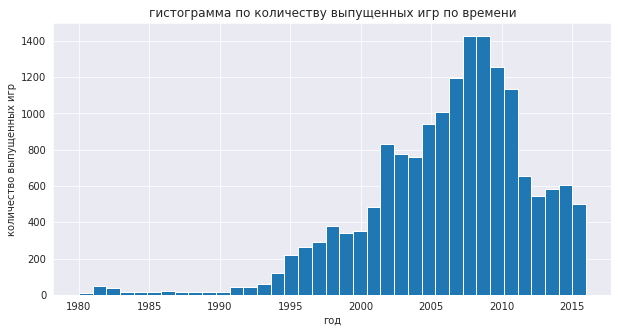

In [13]:
sns.set_style('darkgrid')

data.hist('year_of_release', bins=37, figsize=(10, 5))
plt.title('гистограмма по количеству выпущенных игр по времени')
plt.ylabel('количество выпущенных игр')
plt.xlabel('год')
plt.show()

Мы видим, что до 1995 года игры выпускались в малом количестве. Это определенно связанно с уровнем развития технологий: не у каждого был компьютер, а многих приставок еще просто не существовало. Зато после 1995 мы наблюдаем резкий рост, такой же скачок есть в 2002 и в 2005 годах. Скорее всего это связано с выходом новых игровых консолей да и вообще популяризации видеоигр. Также наблюдаем резкий спад количества с 2012 по 2015. Подобное можно обосновать трудностями выпуска новых игр: чтобы привлечь игроков, создателям приходится сильно улучшать техническую часть игры, а это стоит немалых денег и времени. Поэтому игры и начали выходить реже, но качественнее.

Подобные изменения выпускаемости игр говорит о динамичности игрового рынка. Это означает, что для лучшего прогноза успешности игр стоит брать актуальный период времени для исследования. Определить это время поможет анализ времени популярности игровых платформ.

<a id="platform"></a>
## Как менялись продажи по платформам

Новые игровые платформы с течением какого-то времени технически устаревают. Поэтому для правильной оценки, стоит понять сколько в среднем "живут" платформы. Посмотрим как менялось количество выпускаемых игр по самым пополулярным из них. 

Для начала посмотрим распределение по всем.

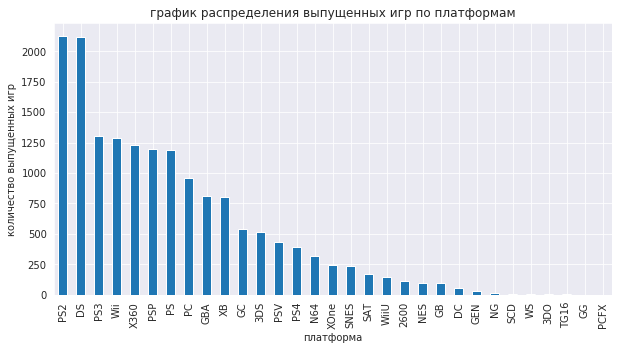

In [14]:
top_platforms = data.platform.value_counts()

top_platforms.plot(kind='bar', figsize=(10, 5))
plt.title('график распределения выпущенных игр по платформам')
plt.ylabel('количество выпущенных игр')
plt.xlabel('платформа')
plt.show()

Логично взять верхушку списка - платформы с более чем тысячью выпущенных игр, однако интересно было бы посмотерть на платформу *PC (персональный компьютер)*, ведь в отличие от платформ предназначенных только для игр, PC есть почти у всех. Поэтому захватим в наш топ и ее и построим для них график изменений суммарных выпусков игр по годам.

In [15]:
top_platforms = top_platforms.head(8).index
top_platforms

Index(['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC'], dtype='object')

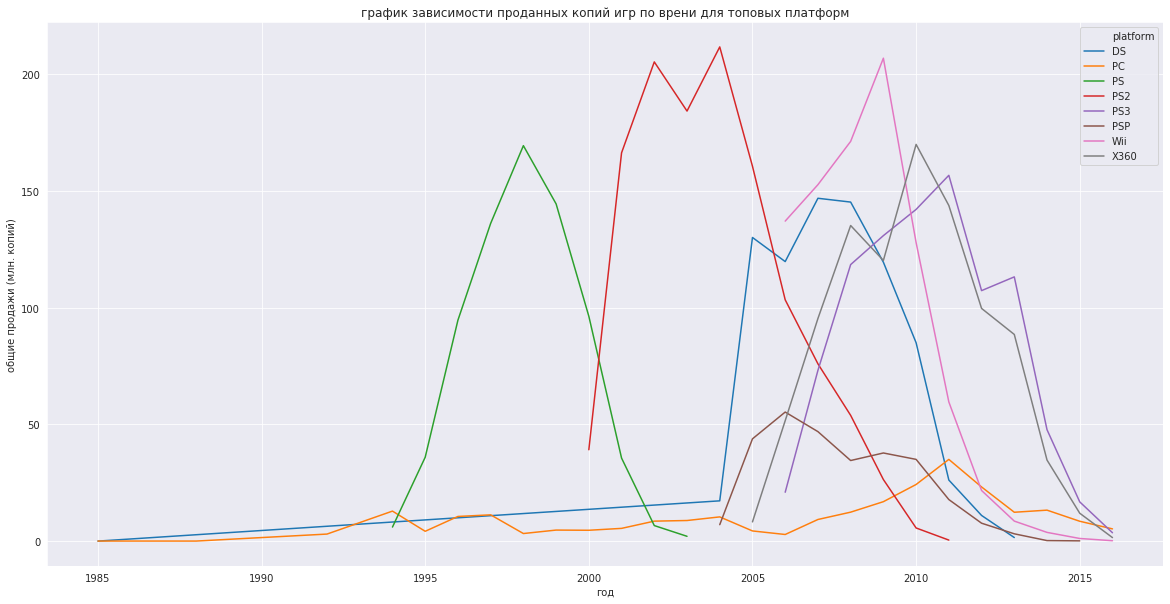

In [16]:
# посторим сводную таблицу, состоящую из трёх колонок: названия платформы, год и общая прибыль за этот год
# и уже по ней будем строить график
platform_data = (data
                 .query('platform in @top_platforms')
                 .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
                 .reset_index()
                )
plt.figure(figsize=(20,10))
sns.lineplot(data=platform_data, x="year_of_release", y="total_sales", hue="platform")

plt.title('график зависимости проданных копий игр по врени для топовых платформ')
plt.ylabel('общие продажи (млн. копий)')
plt.xlabel('год')
plt.show()

Из графика можно сделать вывод: среднее время актуальнотси игровой платформы около *7 лет*.

Однако семилетний период, это довольно большой промежуток времени в такой быстро меняющейся индустрии, как компьютерные игры. Здесь явно стоит взять меньший период. Учитывая показания гистограммы по количеству выпущенных игр по времени из прошлого пункта, последний резкий скачок значений был с 2011 на 2012 год. После него, вплоть до 2016 значния не сильно менялись. Поэтому определим **актуальное время для исследования - 2012-2016 годы.** 

In [17]:
# запишем в новую переменную actual_data информацию о играх с 2012 года
actual_data = data.query('year_of_release >= 2012')

Однако хочется сакцентировать внимание на линию *PC (персональный компьютер)*. Здесь сложно выявить время когда платформа актуальна и нет. На протяжении всего времени есть как пики, так и спады. Это логично, ведь в отличии от платформ предназначенных только для игр, компьютеры есть у всех и какое-то количество людей,пускай и минимальное, постоянно будет играть на ПК. На вопрос о таких маленьких цифрах продаж приходит один логичный ответ - на ПК гораздо проще устанавливать пиратские версии игр.

<a id="topplatform"></a>
##  Опеределение потенциально прибыльных платформ

Теперь нужно посмотреть какие платформы лидируют по продажам в выявленное актуально время.

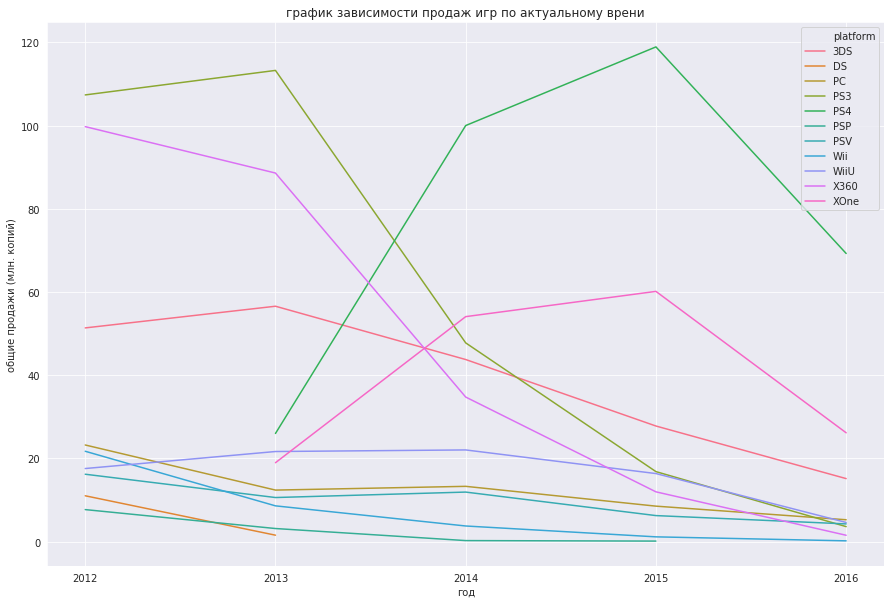

In [18]:
platform_data = (actual_data
                 .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
                 .reset_index()
                )
plt.figure(figsize=(15,10))
sns.lineplot(data=platform_data, x="year_of_release", y="total_sales", hue="platform")
plt.title('график зависимости продаж игр по актуальному врени')
plt.ylabel('общие продажи (млн. копий)')
plt.xlabel('год')
plt.xticks([2012, 2013, 2014, 2015, 2016])
plt.show()

На фоне множетсва платформ явными фаворитами выделяются *PS4* и *XOne*. Мы не будем учитывать их спад за 2016 год, ведь в технической документации сказанно, что данные за этот год могут быть неполными. Помимо них, пределенно стоит рассматривать в дальнейшем исслеовании платформы *3DS*, *PS3* и *X360*. Продажи по ним падают, но все еще держатся на значимом уровне.

Оставим только те данные, которые соответствуют выявленным платформам. На них и будем проводить дальнейшие исследования.

In [19]:
actual_platform_data = actual_data.query('platform in ("PS4", "XOne", "3DS", "PS3", "X360")')

Взглянем на разброс продаж по выделенным платформам.

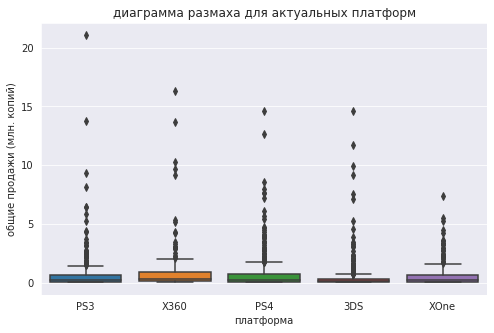

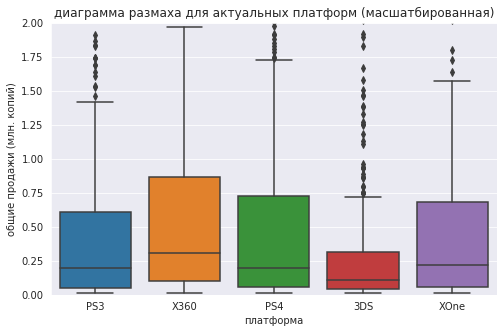

In [20]:
plt.rcParams['figure.figsize']=(8, 5)
sns.boxplot(x="platform", y="total_sales", data=actual_platform_data)
plt.title('диаграмма размаха для актуальных платформ')
plt.ylabel('общие продажи (млн. копий)')
plt.xlabel('платформа')
plt.show()

sns.boxplot(x="platform", y="total_sales", data=actual_platform_data)
plt.ylim(0, 2)
plt.title('диаграмма размаха для актуальных платформ (масшатбированная)')
plt.ylabel('общие продажи (млн. копий)')
plt.xlabel('платформа')
plt.show()

Из графика видим, что наибольшая средняя продаваемость у платформы *X360* и даже игры с продажами в 2 млн. копий входят в границы верхнего уса. Затем почти идентичны платформы *PS4* и *XOne*. Чуть менее хуже дела у *PS3* - межквартильный размах меньше, но медиана на таком же уровне, как и у предылущих двух. Наименьшая продаваемость у платформы *3DS*. 

Судя по выбросам, у всех платформ кроме *3DS* есть "звезды" - игры с действительно большими продажами.

<a id="score"></a>
## Как влияют на продажи отзывы пользователей и критиков

Рассмотрим этот вопрос на примере одной из самых популяных в 2015 платформ PS4. Построим диаграммы рассеяния и рассчитаем коэффициент корреляции Пирсона, чтобы рассмотреть взаимосвязи.

**Отзывы пользователей**

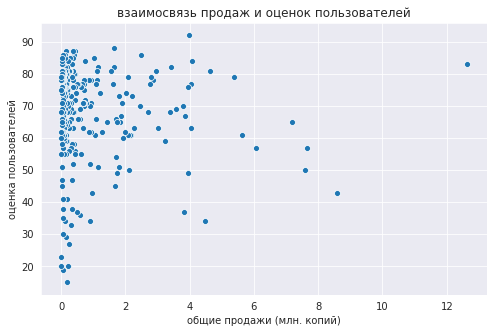

In [21]:
# в новую переменную ps4_data сохраним только данные для платформы PS4
ps4_data = actual_platform_data.query('platform == "PS4"')

sns.scatterplot(data=ps4_data, x="total_sales", y="user_score")
plt.title('взаимосвязь продаж и оценок пользователей')
plt.ylabel('оценка пользователей')
plt.xlabel('общие продажи (млн. копий)')
plt.show()

In [22]:
# рассчитаем коэффициент корреляции
ps4_data['total_sales'].astype('float64').corr(ps4_data['user_score'].astype('float64'))

-0.031957110204556445

Коэффициент полчился почти нулевым, поэтому мы точно можем сказать, что линейной зависимости между продажами и оценками пользователей нет. Однако если не учитывать единичные случаи, можно наблюдать, что чем выше оценка, тем большая у игр продаваемость.

**Отзывы крититков**

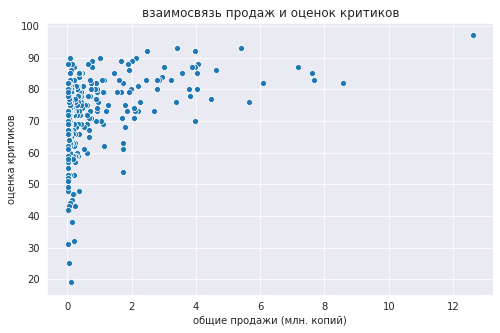

In [23]:
sns.scatterplot(data=ps4_data, x="total_sales", y="critic_score")
plt.title('взаимосвязь продаж и оценок критиков')
plt.ylabel('оценка критиков')
plt.xlabel('общие продажи (млн. копий)')
plt.show()

In [24]:
ps4_data['total_sales'].astype('float64').corr(ps4_data['critic_score'].astype('float64'))

0.406567902061781

Здесь наблюдаем умеренную корреляцию. Взаимосвязь такая же, как и с пользовательскимми оценками -  чем выше оценка, тем большая у игр продаваемость, но у оценок критиков она более ярко выражена. 

Из этого можно сделать **вывод**: *стоит больше доверять критикам, нежели пользователям*. Оценки критиков лучше скажут у какой игры есть возможность получить высокие продажи.

Теперь сравним полученные результаты с общей картиной. Построим те же диаграммы рассеяния, для всех остальных платформ кроме PS4.

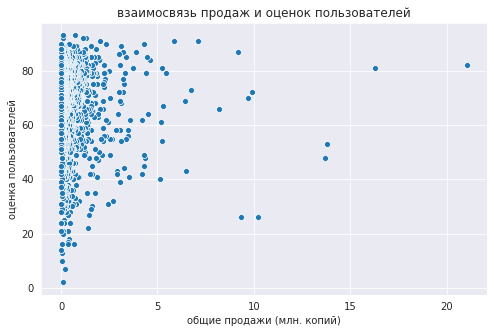

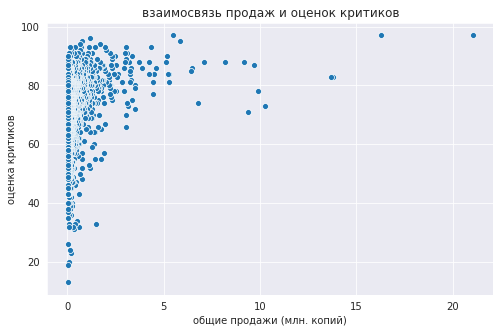

In [25]:
other = actual_data.query('platform != "PS4"')
sns.scatterplot(data=other, x="total_sales", y="user_score")
plt.title('взаимосвязь продаж и оценок пользователей')
plt.ylabel('оценка пользователей')
plt.xlabel('общие продажи (млн. копий)')
plt.show()

sns.scatterplot(data=other, x="total_sales", y="critic_score")
plt.title('взаимосвязь продаж и оценок критиков')
plt.ylabel('оценка критиков')
plt.xlabel('общие продажи (млн. копий)')
plt.show()

В целом картина та же самая. Поэтому выводы по PS4 справделивы и для других игровых платформ - оценка критиков заслуживает большего доверия.

<a id="genre"></a>
## Общее распределение игр по жанрам

Теперь исследуем зависят ли продажи от жанра игр. Для изучения этого вопроса недостаточно посмотреть сколько продали всех игр по жанру суммарно. Нужно также изучить сколько игр в каждом жанре продавалось и сколько в среднем продали по кажому жанру.

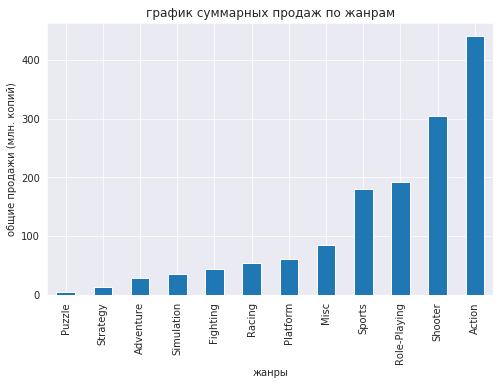

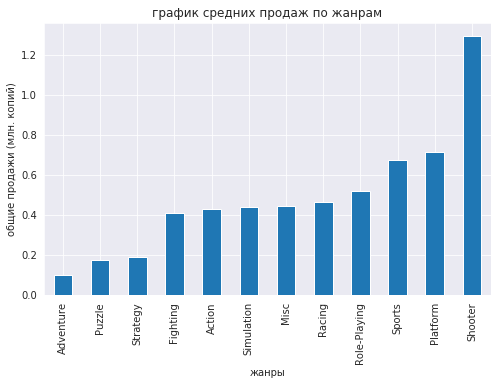

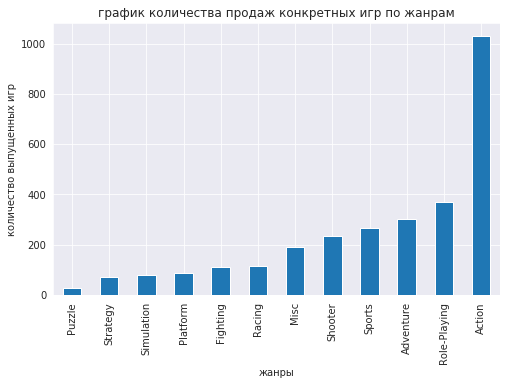

In [26]:
# сначала создадим сводную, в которой будут отображаться жанры и их продажи
# затем отсортитруем для наглядности и построим барплот

# график суммарных продаж по жанрам
(actual_data
 .pivot_table(index='genre', values='total_sales', aggfunc='sum')
 .sort_values(by='total_sales')
 .plot(kind='bar', legend=False)
)
plt.title('график суммарных продаж по жанрам')
plt.ylabel('общие продажи (млн. копий)')
plt.xlabel('жанры')
plt.show()

# график средних продаж по жанрам
(actual_data
 .pivot_table(index='genre', values='total_sales', aggfunc='mean')
 .sort_values(by='total_sales')
 .plot(kind='bar', legend=False)
)
plt.title('график средних продаж по жанрам')
plt.ylabel('общие продажи (млн. копий)')
plt.xlabel('жанры')
plt.show()

# график количества продаж конкретных игр по жанрам
(actual_data
 .pivot_table(index='genre', values='total_sales', aggfunc='count')
 .sort_values(by='total_sales')
 .plot(kind='bar', legend=False)
)
plt.title('график количества продаж конкретных игр по жанрам')
plt.ylabel('количество выпущенных игр')
plt.xlabel('жанры')
plt.show()

Судя по графику суммарных продаж по жанрам, может показаться что, *Action* наиболее продаваемый жанр игр. Однако, заглянув в график количества продаж конкретных игр по жанрам, мы видим что он занял первое место только потому, что игр подобного жанра появлялось больше всго. Средние продажи у *Action* довльно низкие по сравнию с другими жанрами. 

График средних продаж по жанрам выявил настоящего лидера - жанр *Shooter*. Он продается почти в два раза лучше, чем любой другой. И даже не смотря на то, что шутеров выпускалось в 5 раз меньше чем экшн-игр, *Shooter* отстает от суммарных продаж от *Action* всего на четверть.

<a id="ouput3"></a>
### Вывод:

В ходе анализа:
- было определенно актуальное время для исслдеования - 2012-2016 годы;
- выявили две наиболее востребованные на 2017 год игровые платформы - *PS4* и *XOne*, и менее востребованные, но все еще актуальные - *3DS*, *PS3* и *X360*;
- выяснили, что оценкам критиков стоит больше доверять, нежели оценкам пользователей;
- выявлен самый продоваемые жанр игр - *Shooter*.

<a id="step4"></a>
# Шаг 4. Составление портретов пользователей каждого региона

Предпочтения геймеров могут меняться в зависимтости от регионов. Проверим это на трёх показателях: игровых платформах, жанрах и возрастному рейтингу.

<a id="pref_platform"></a>
## Различия в предпочтении платформ

Санчала выявим топ-5 игровых платформ, а затем посмотрим на различия в долях продаж по выделенным регионам: Северная Америка, Европа и Япония.

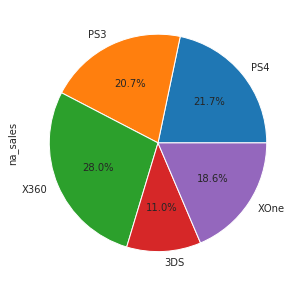

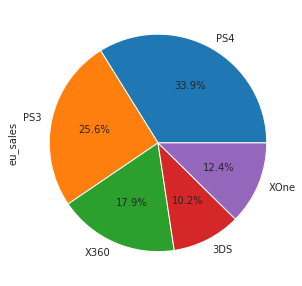

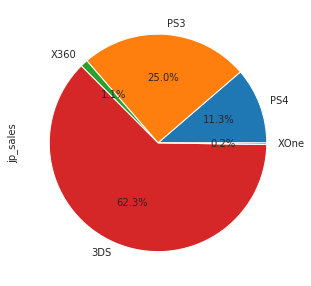

In [27]:
# группируем данные
platform_preference = (actual_data
                                  .groupby('platform')
                                  .sum()
                                  .sort_values('total_sales', ascending=False)[['na_sales', 'eu_sales', 'jp_sales']]
                                  .head(5)
                       )
# циклом выводим распределения по регионам
for elem in platform_preference.columns:
    platform_preference[elem].plot(kind='pie', autopct='%1.1f%%')
    plt.show()

Наблюдаем довольно схожие результаты для Северной Америки и Европы. Однако есть некоторые отличия.

В СА большинство играют в *X360*(28%), а у платформ *PS3*, *PS4* и *XOne* приблизительно одинаковые доли в районе 20%. Наименее популярна *3DS* (11%).

В Европе самая продаваемые сеймейсво PlayStation - *PS4*(33.9%) и *PS3*(25.6%). После них идет *X360*, а у платформ *3DS* и *XOne* наименьшие доли в районе 10%.

Совсем иначе обстаят дела в Японии. Здесь доминирует одна платформа *3DS*, которая занимает 62.3% от общих продаж. Затем идут *PS3*(25%) и *PS4*(11.3%). Почти не покупаются здесь игры на платформах *X360* и *XOne*.

<a id="pref_genre"></a>
## Различия в предпочтении жанров

Изучим предпочтения в жанрах. Также сгруппируем данные по исследуемому параметру и покажем распределения на круговых диаграммах.

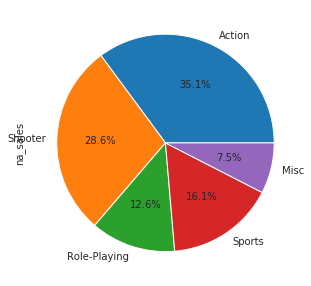

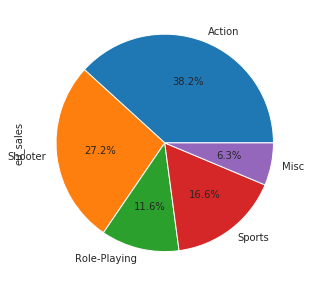

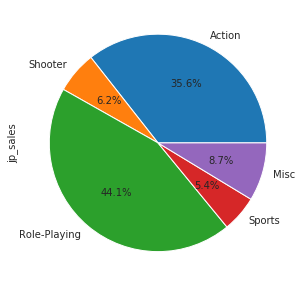

In [28]:
genre_preference = (actual_data
                               .groupby('genre')
                               .sum()
                               .sort_values('total_sales', ascending=False)[['na_sales', 'eu_sales', 'jp_sales']]
                               .head(5)
                    )
for elem in genre_preference.columns:
    genre_preference[elem].plot(kind='pie', autopct='%1.1f%%')
    plt.show()

И снова видим схожие результаты у СА и Европы. Здесь они почти идентичны. Лучше всего рапродаются игры жанры *Action*, затем *Shooter*. Вместе они занимают долю больше половины. Менее популярны игры жанра *Sports*, а *Role-Playing* и *Misc* занимают последние позиции.

Япония снова отличилась. Здесь самым популярным жанром оказался *Role-Playing* и занимает он немного менее половины (44.1%). На втором месте все же популярный жанр *Action*. За ним идет *Misc*(8.7%). А меньше всего играют в *Shooter* и *Sports*.

<a id="rating"></a>
## Влияние рейтинга ESRB на продажи в регионах

Для решения этой задачи используем тот же алгоритм. А чтобы не упустить часть данных пропущенных данных, заменим их на уже известную абберивиатуру "tbd".

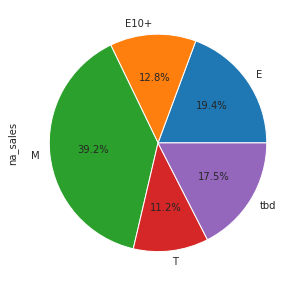

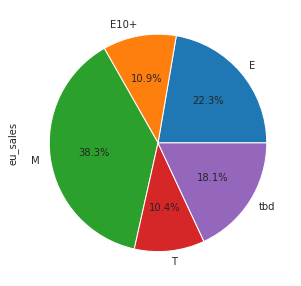

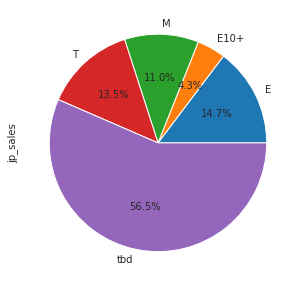

In [29]:
# заполняем пропущенные значения
esrb_data = actual_data.copy()
esrb_data['rating'] = esrb_data['rating'].fillna('tbd')

# группируем по рэйтингу
esrb_data_pivot = esrb_data.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum()

# выводим пайчарты для каждого региона
for elem in esrb_data_pivot.columns:
    esrb_data_pivot[elem].plot(kind='pie', autopct='%1.1f%%')
    plt.show()

На графиках видим, что ситуации в Европе и Северной Америки очень схожи. В обоих регионах в сильно распространены игры под рейтинго *М*. Игры без рейтинга и рейтнгом *Е* занимают приблизительно одинаковые доли около 20%. Остальные рейтинги делят оставшюся часть почти поровну.

Другая ситуация в Японии. Здесь самые продаваемые игры без рейтинга и занимают они больше половины от всех продаж. Скорее всего подобное можно объяснить тем, что в Японии выпускается большое количество игр, многие из которых не выходят на мировой рынок, но метсное население успевает в них поиграть. Распределение по остальным рейтингам тоже поменялось: здесь рейтинг *T* почти сравнялся по доле с *Е*, а *М* упал и теперь располагается на предпоследнем месте в долях от продаж. 

<a id="ouput4"></a>
### Вывод:

Игроки Северной Америки и Европы довольно схожи в своих предпочтениях. Для этих регионов можно строить приблизительно одинаковые прогнозы по продажам. Однако стоит учитывать, что в СА более распространены платформы фирмы *Xbox*, а в Европе - *PlayStation*. 

А вот Японский рынок видеоигр сильно отличается, здесь нужно учитывать местные предпочтения гемеров. 

<a id="step5"></a>
# Шаг 5. Проверка гипотез

<a id="first"></a>
## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для проверки соотношения средних значений выборок отлично подходит критерий Стьюдента. Им и воспользуемся.

Cначала сформулируем нулевую гипотезу *Н0*, она должна содержать в себе равенство значений. Затем определим альтернативную гипотезу *Н1*.

- **H0** - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- **Н1** -  средние пользовательские рейтинги платформ Xbox One и PC отличаются.

Решить отвергать или нет Н0 нам поможет p-value. Оно покажет нам вероятность отвергнуть гипотезу Н0, при условии что она верна. Затем сравним p-value с общепринятым порогом статистической значимости в 5%.

Также для более точной проверки стоит понять сильно ли различаются дисперсии.

In [30]:
# оставим в новой переменной clear_user данные без пропусков в столбце user_score
clear_user = actual_data.dropna(subset=['user_score'])

# сохраним в новые переменные выборки для обеих платформ
xone = clear_user.query('platform == "XOne"')['user_score']
pc = clear_user.query('platform == "PC"')['user_score']

print(f'Дисперсия по XboxOne: {np.var(xone)}')
print(f'Дисперсия по PC: {np.var(pc)}')

Дисперсия по XboxOne: 190.69968429360694
Дисперсия по PC: 277.04439971584185


Дисперсии отличаются более чем на 5%, поэтому укажем это при оценке средних.

In [31]:
results = st.ttest_ind(xone, pc, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < 0.05:
    print("Отвергаем нулевую гипотезу")
else: 
    print('Нет оснований отвергать нулевую гипотезу')

p-значение: 0.5489537965135058
Нет оснований отвергать нулевую гипотезу


### Вывод:

Тест показал, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые на уровне 5% значимости.

<a id="second"></a>
## Средние пользовательские рейтинги жанров Action и Sports разные

Для проверки этой гипотезы также отлично подходит критерий Стьюдента. Сформулируем гипотезы:

- **H0** - средние пользовательские рейтинги жанров Action и Sports одинаковые;
- **Н1** -  средние пользовательские рейтинги жанров Action и Sports разные.

Сначала сравним дисперсии.

In [32]:
action = clear_user.query('genre == "Action"')['user_score']
sports = clear_user.query('genre == "Sports"')['user_score']

print(f'Дисперсия по Action: {np.var(action)}')
print(f'Дисперсия по Sports: {np.var(sports)}')

Дисперсия по Action: 188.90840494348112
Дисперсия по Sports: 302.2890298704732


Дисперсии различны.

In [33]:
results2 = st.ttest_ind(action, sports, equal_var = False)

print('p-значение:', results2.pvalue)

if results2.pvalue < 0.05:
    print("Отвергаем нулевую гипотезу")
else: 
    print('Нет оснований отвергать нулевую гипотезу')

p-значение: 4.243077765726105e-20
Отвергаем нулевую гипотезу


### Вывод:

Результат теста дал нам основания отвергунть нулевую гипотезу. А значит мы имеем право утверждать, что средние пользовательские рейтинги жанров Action и Sports разные на уровне значимости 5%.

<a id="end"></a>
# Шаг 6. Общий вывод

Входные данные представляли собой таблицу, где каждая строка описывала конкретную игру по 11 признакам.

Во время предобработки были выявлены следующие проблемы:
- названия столбцов в разных гегистрах
- отстутсвующие значения
- несоответствие даных ожидаемому типу

Каждая из проблем была обработана соответствующими методами и исправлена по принципу улучшения качества последеющего анализа.

Также к таблице был добавлен новый столбец для упрощения дальнейшего исследования и повышения информативности данных.

**Результаты анализа:**
- Две самые актуальные платформы на 2017 год: *PS4* и *XOne*. На них стоит смотреть в первую очередь. Также выявили менее востребованные, но все еще актуальные - *3DS*, *PS3* и *X360*, ими не стоит пренебрегать. 
- Наибольшая средняя продаваемость у платформы X360, немного меньше у *PS4*, *PS3* и *XOne*. У платформы *3DS* маленькая средняя продаваемость и на нее стоит обращать внимание только в отдельных случаях.
- Планировать рекламные кампании стоит в соответствии с *оценками критиков*. Они вероятнее всего предскажут наиболее продаваемые игры.
- Самый продаваемый жанр игр - *Shooter*.
- Игроки Северной Америки и Европы довольно схожи по своим предпочтениям. Геймеры обоих регионов выбирают игры в жанрах *Action* и *Shooter* и возрастным рэйтингом *M*. Есть лишь небольшое различие в выборе игровых платформ: в СА более распространены платформы фирмы Xbox, а в Европе - PlayStation.
- Стоит отличать японских игроков. Наиболее популярной платформой у них является *3DS*, но также 35% играют и в PlayStation. Набиолее предпочтительные жанры *Role-Playing* и *Action*. Японцы предпочитают игры без возрастного рейтинга.

Магазину "Стримчик" *рекомнедуется* делать ставку на потенциально популярный продукт и планировать рекламные кампании в соответствии с результатами исследования.